In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
data = pd.read_csv("netflix_movie_content_based.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.shape

(8807, 12)

In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### we will see how many movies released in each year

In [5]:
release_year = data["release_year"]
release_year

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [6]:
release_year = release_year.value_counts().dropna(False)
release_year

C:\Users\rohan.raza\AppData\Local\Temp\ipykernel_3308\880887346.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  release_year = release_year.value_counts().dropna(False)


2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

#### we will take those years in which 100 or more movies released

In [7]:
release_year = release_year[release_year>=100].sort_index()
release_year.index = release_year.index.astype(int)
release_year

2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, dtype: int64

In [8]:
years = release_year.index.to_list()
movie_count = release_year.values.tolist()

In [9]:
max_movie_count = years[movie_count.index(max(movie_count))]
max_movie_count

2018

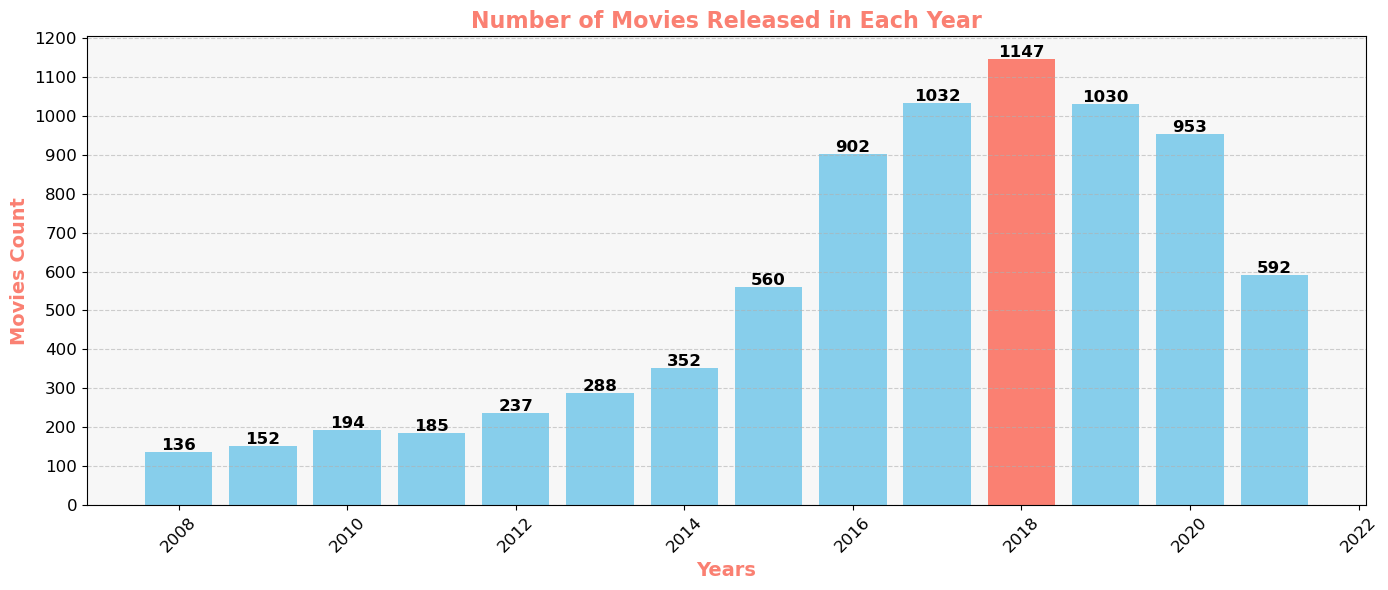

In [10]:
plt.figure(figsize=(14,6))

plt.bar(years,movie_count,color="skyblue")
plt.ylabel("Movies Count",fontsize = 14,color = 'salmon',fontweight='bold')
plt.xlabel("Years",fontsize = 14, color = 'salmon',fontweight='bold')
plt.title('Number of Movies Released in Each Year', fontsize = 16,color = "salmon",fontweight='bold')
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(range(0,1301,100))
plt.grid(axis='y',linestyle='--',alpha=0.6)

# labeling data
for year,count in zip(years,movie_count):
    plt.text(year, count + 5, str(count), ha='center',fontsize=12,fontweight='bold')
    
# Highlighting max value
highlited = years.index(max_movie_count)
plt.bar(years[highlited],movie_count[highlited],color='salmon')


plt.gca().set_facecolor("#f7f7f7")
plt.tight_layout()
plt.show()

### Now will check which country released more movies

In [11]:
country = data["country"]
country

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [12]:
country = country.value_counts().dropna(False)
country

C:\Users\rohan.raza\AppData\Local\Temp\ipykernel_3308\3747094146.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  country = country.value_counts().dropna(False)


United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [13]:
country.agg(func=("max","min","mean"))

max     2818.000000
min        1.000000
mean      10.663102
Name: country, dtype: float64

#### will take 100 or more

In [14]:
country = country[country>=100].sort_index()
country

Canada             181
Egypt              106
France             124
India              972
Japan              245
Mexico             110
South Korea        199
Spain              145
Turkey             105
United Kingdom     419
United States     2818
Name: country, dtype: int64

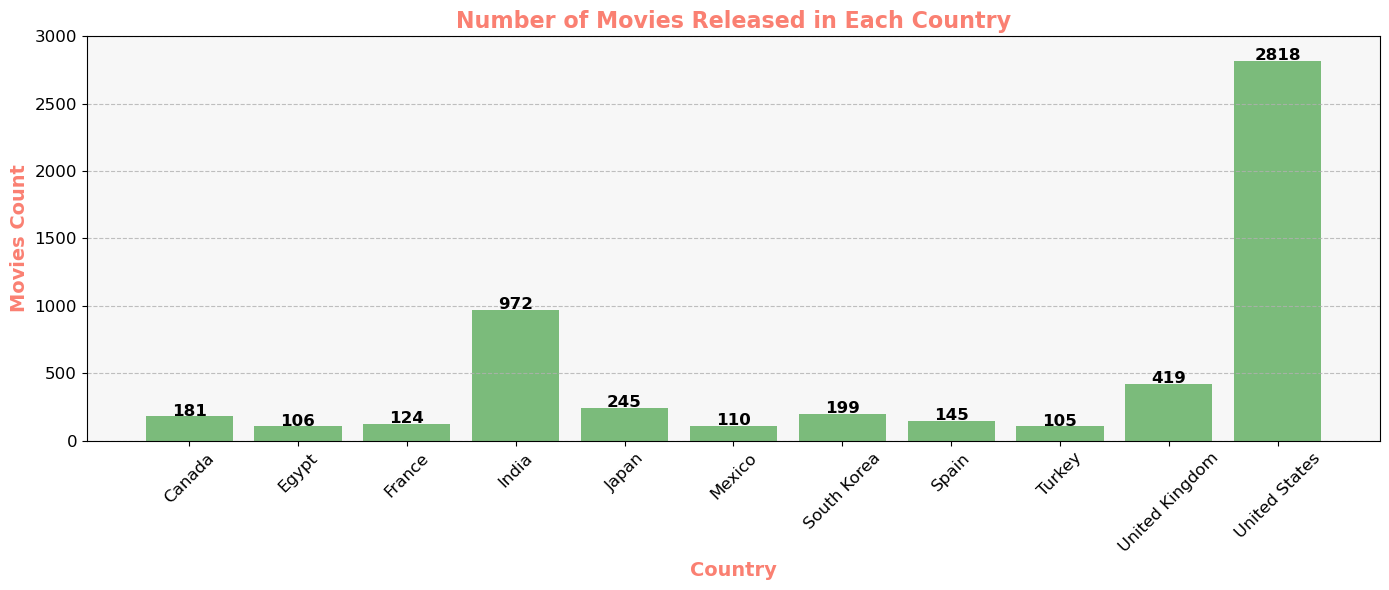

In [15]:
plt.figure(figsize=(14,6))



plt.bar(country.index,country,color = "green",alpha=0.5)
plt.ylabel("Movies Count",fontsize = 14,color = 'salmon',fontweight='bold')
plt.xlabel("Country",fontsize = 14, color = 'salmon',fontweight='bold')
plt.title('Number of Movies Released in Each Country', fontsize = 16,color = "salmon",fontweight='bold')
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle = "--",alpha=0.8)
plt.yticks(range(0,3001,500))

for country, count in zip(country.index,country):
    plt.text(country, count + 5 , str(count), ha='center',fontweight='bold',fontsize=12)





plt.gca().set_facecolor('#f7f7f7')
plt.tight_layout()
plt.show()


### Will Check the types and its frequency

In [16]:
types = data["type"]
types

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [17]:
types.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

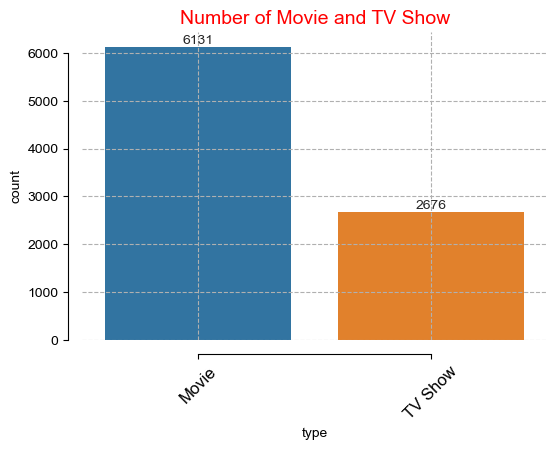

In [18]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='type', data=data)
sns.despine(offset=10,trim=True)
sns.set_style("dark")

plt.title("Number of Movie and TV Show", fontsize=14, color='red')
plt.xticks(fontsize=12,rotation=45)
plt.grid(True,linestyle='--')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Will check genre frequency

In [19]:
lists = data['listed_in'].value_counts()
lists

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [20]:
genre_counts = lists[lists >= 100].sort_index(ascending = False)
genre_counts

Stand-Up Comedy                                      334
Kids' TV                                             220
International TV Shows, TV Dramas                    121
Dramas, International Movies, Thrillers              134
Dramas, International Movies, Romantic Movies        180
Dramas, International Movies                         362
Dramas, Independent Movies, International Movies     252
Dramas, Independent Movies                           100
Dramas                                               138
Documentaries, International Movies                  186
Documentaries                                        359
Crime TV Shows, International TV Shows, TV Dramas    110
Comedies, International Movies, Romantic Movies      152
Comedies, International Movies                       176
Comedies, Dramas, International Movies               274
Comedies, Dramas, Independent Movies                 116
Comedies                                             110
Children & Family Movies, Comed

In [21]:
genre_counts_max = genre_counts.idxmax()
genre_counts_max

'Dramas, International Movies'

In [22]:
genres = genre_counts.index
genre_counts = genre_counts.values

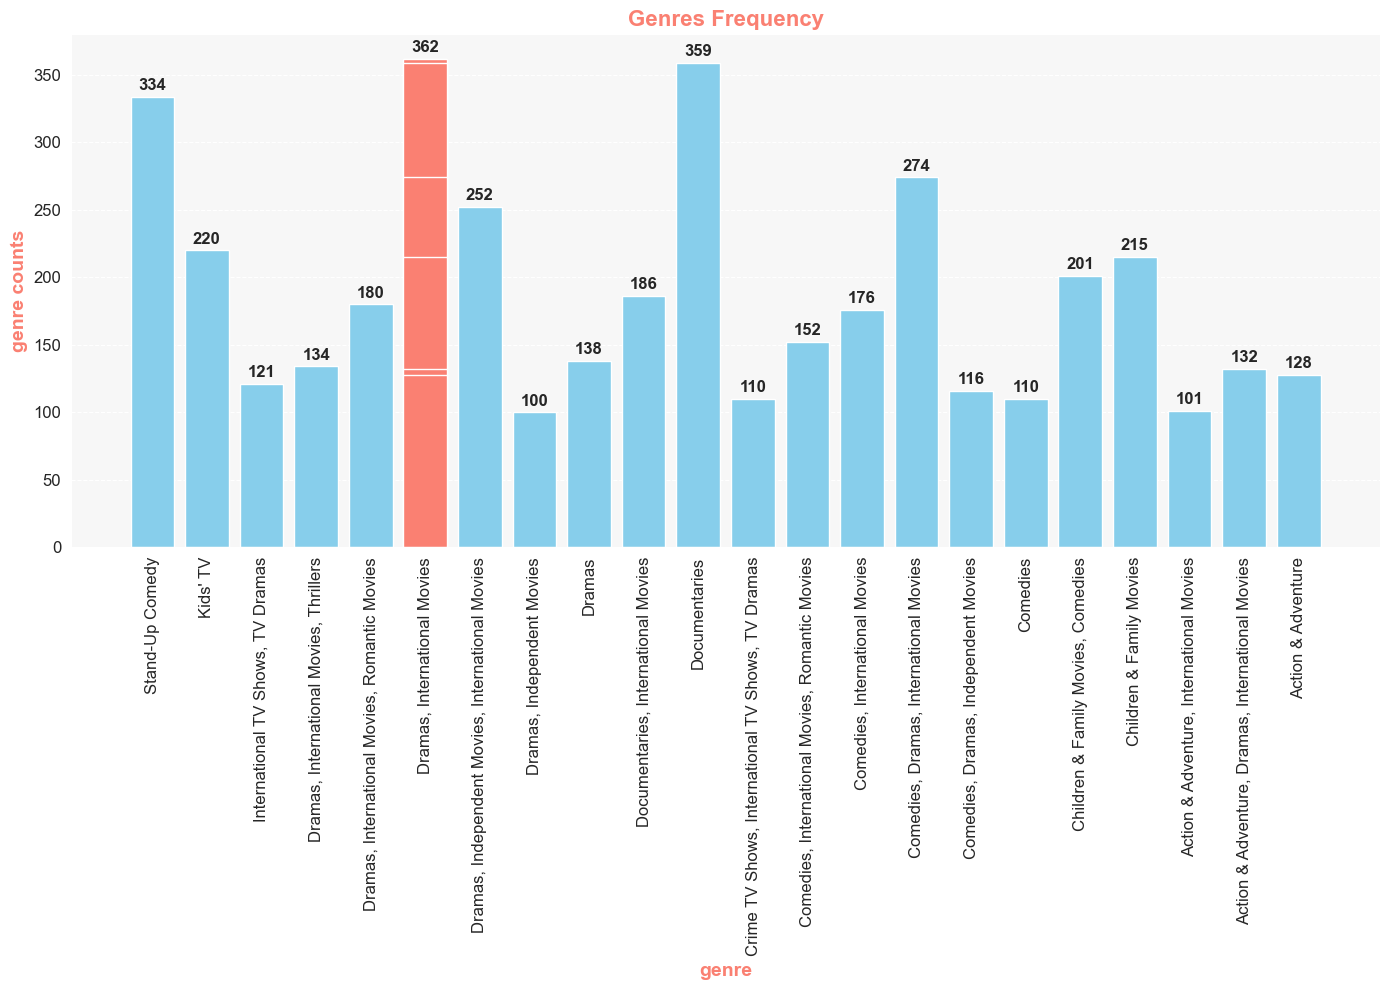

In [23]:
plt.figure(figsize=(14,10))

plt.bar(genres,genre_counts,color="skyblue")
plt.ylabel("genre counts",fontsize = 14,color = 'salmon',fontweight='bold')
plt.xlabel("genre",fontsize = 14, color = 'salmon',fontweight='bold')
plt.title('Genres Frequency', fontsize = 16,color = "salmon",fontweight='bold')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(range(0,370,50))
plt.grid(axis='y',linestyle='--')


#highlit
plt.bar(genre_counts_max,genre_counts,color='salmon')

# labeling data
for genres,count in zip(genres,genre_counts):
    plt.text(genres, count + 5, str(count), ha='center',fontsize=12,fontweight='bold')
    

plt.gca().set_facecolor("#f7f7f7")
plt.tight_layout()
plt.show()

### Will see which words are mostly used in description

In [24]:
data['description']

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [25]:
description = data['description'].dropna().values.tolist()
description[:3]

['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.',
 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
 'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.']

In [26]:
all_description = " ".join(description)
all_description

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable. After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth. To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war. Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series. In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life. The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe. Equestria\'s divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be

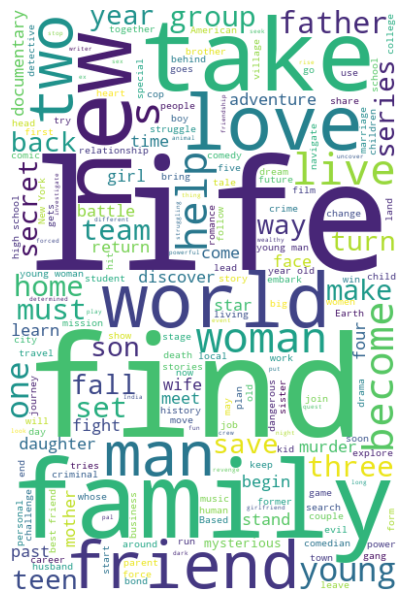

In [30]:
from wordcloud import WordCloud

cloud = WordCloud(width=400,height=600,background_color='white').generate(all_description)

plt.figure(figsize=(5,25))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')

plt.show()